### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8 
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [357]:
data = pd.read_csv('data/coupons.csv')

In [358]:
data.shape

(12684, 26)

In [359]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [360]:
#Check for null values 
data.isnull().sum(axis = 0)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [361]:
# The 'car' column has nearly 99% of its values missing, so we can drop this column

In [362]:
data = data.drop(columns=['car'])
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [363]:
#Check for duplicates and drop them
data = data.drop_duplicates()

In [364]:
data.shape

(12610, 25)

4. What proportion of the total observations chose to accept the coupon?



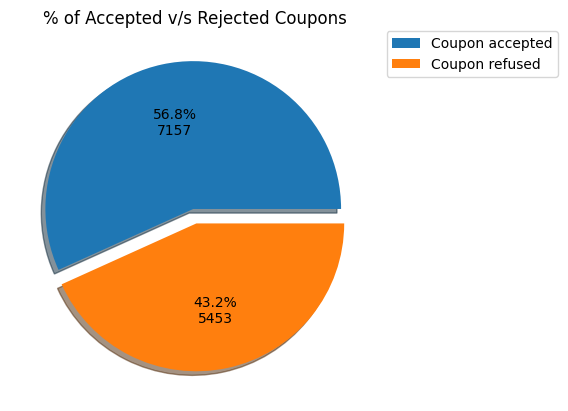

In [365]:
# Checking the coupon acceptance v/s rejection rate for the entire dataset
custom_labels = ["Coupon accepted","Coupon refused"]

def format(x):
    return '{:1.1f}%\n{:.0f}'.format(x,  (data['Y'].value_counts().values.sum())*x/100)

data_Y = data["Y"].value_counts()

ax = data_Y.plot(kind="pie", autopct=format, shadow=True, explode=[0.05, 0.05], labels=custom_labels, legend=True, title='% of Accepted v/s Rejected Coupons',ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

56.8% of the surveyed drivers accepted the coupon

5. Use a bar plot to visualize the `coupon` column.

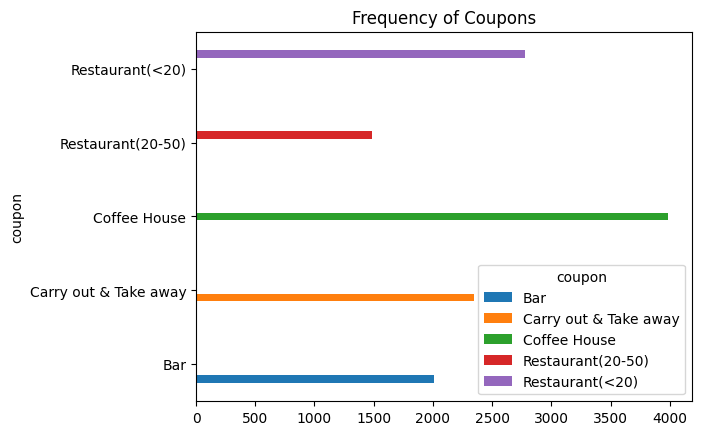

In [366]:
data.groupby('coupon').coupon.value_counts().unstack().plot.barh()
plt.title("Frequency of Coupons")
plt.show()

6. Use a histogram to visualize the temperature column.

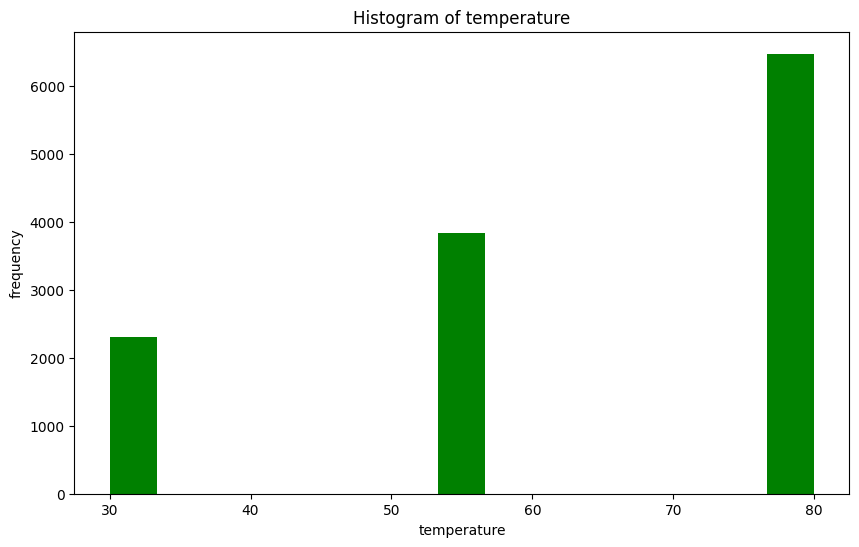

In [367]:
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=15, color='green')
plt.title('Histogram of temperature')
plt.xlabel('temperature')
plt.ylabel('frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [368]:
df_bar = data.query('coupon == "Bar"') 
df_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [369]:
#Calculate the accepted bar coupons
accepted_bar_coupons = df_bar.query('Y==1').Y.sum()
print("Accepted bar coupons are ", accepted_bar_coupons)

#Calculate the total bar coupons
total_bar_coupons = len(df_bar)
print("Total bar coupons are ", total_bar_coupons)

bar_coupons_accepted_prop = (accepted_bar_coupons / total_bar_coupons) * 100
print(f"Bar coupon acceptance rate % {bar_coupons_accepted_prop:.2f}")

Accepted bar coupons are  824
Total bar coupons are  2010
Bar coupon acceptance rate % 41.00


The acceptance rate for Bar coupons is 41%

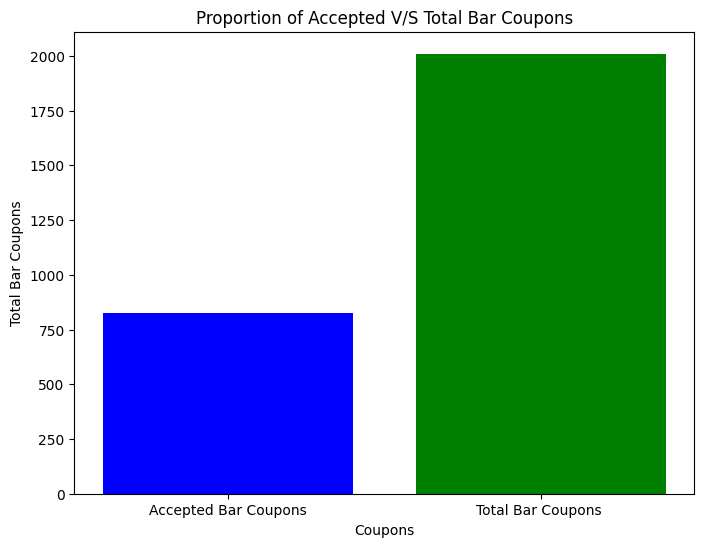

In [370]:
# Checking the coupon bar acceptances v/s  total bar coupons
plt.figure(figsize=(8, 6))
plt.bar(['Accepted Bar Coupons', 'Total Bar Coupons '], [accepted_bar_coupons, total_bar_coupons], color=['Blue', 'Green'])
plt.title('Proportion of Accepted V/S Total Bar Coupons')
plt.xlabel('Coupons')
plt.ylabel('Total Bar Coupons')
plt.show()



3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [371]:
#Lookup all the possible values in the Bar column
data['Bar'].value_counts()

never    5178
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: Bar, dtype: int64

In [372]:
#Calculate bar visits for 3 or fewer times
accepted_bar_vists_less_3 = df_bar.query('Y==1 & (Bar == "1~3" | Bar == "less1" | Bar == "never") ').Y.sum()
print("Coupons accepted when bar vists are fewer than 3 times ", accepted_bar_vists_less_3)

#Calculate bar visits greater than 3 times a month
accepted_bar_vists_more_than_3 = df_bar.query('Y==1 & (Bar == "4~8" | Bar == "gt8")').Y.sum()
print("Coupons accepted when bar vists are more than 3 times ", accepted_bar_vists_more_than_3)


#Calculate acceptance rate for the above 2 metrics
bar_coupons_accepted_less_3_times = (accepted_bar_vists_less_3 / total_bar_coupons) * 100
print("Acceptance rate for 3 or few bar visits", bar_coupons_accepted_less_3_times)

bar_coupons_accepted_more_3_times = (accepted_bar_vists_more_than_3 / total_bar_coupons) * 100
print("Acceptance rate for more than 3 bar visits", bar_coupons_accepted_more_3_times)

Coupons accepted when bar vists are fewer than 3 times  663
Coupons accepted when bar vists are more than 3 times  153
Acceptance rate for 3 or few bar visits 32.985074626865675
Acceptance rate for more than 3 bar visits 7.611940298507462


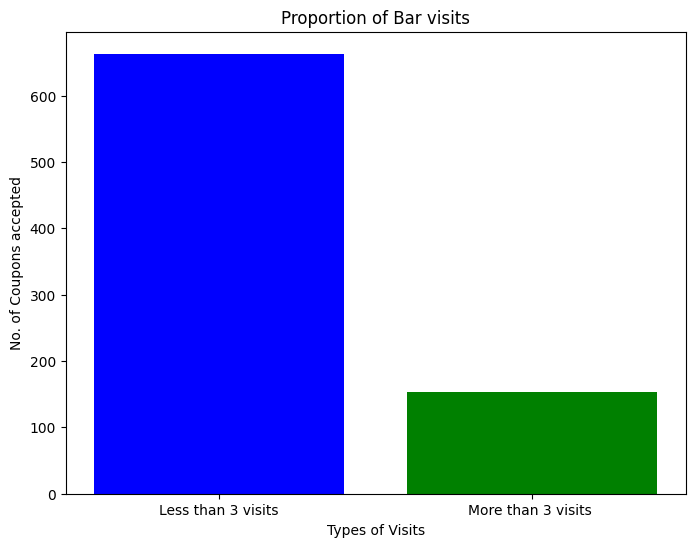

In [373]:
# Visualize the above metrics for bar visits
plt.figure(figsize=(8, 6))
plt.bar(['Less than 3 visits', 'More than 3 visits '], [accepted_bar_vists_less_3, accepted_bar_vists_more_than_3], color=['Blue', 'Green'])
plt.title('Proportion of Bar visits')
plt.xlabel('Types of Visits')
plt.ylabel('No. of Coupons accepted')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [374]:
#Lookup different possible values in the Age column
data['age'].value_counts()

21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: age, dtype: int64

In [406]:
# The ask is ambigious for "drivers who go to a bar more than once a month and are over the age of 25 to all others."
# Here 'all others' could possibly imply drivers less than 25 years and visit bar atleast once a month
# Or drivers over 25 years and visit the bar less than once or never visit a bar.
# I've assumed drivers less than 25 years and visit the bar atleast once

#Convert age categories of 50plus & below21 to numeric. I have assumed anyone over 50 plus is 51 and anyone below 21 is 20
bar_list = ['1~3', 'gt8', '4~8']

df_age = df_bar.query('Y==1 & (Bar in @bar_list) ')[['age','Y']]
df_age["age"] = data["age"].str.replace("50plus","51")
df_age["age"] = df_age["age"].str.replace("below21","20")
df_age["age"] = df_age["age"].astype(int)

df_age_over_25_bar_visits = df_age.query('age > 25').Y.sum()
print("Acceptance rate : drivers over 25 years + visit bar more than once per month: ", (df_age_over_25_bar_visits/total_bar_coupons)*100)

df_age_less_25_bar_visits = df_age.query('age < 25 ').Y.sum()
print("Acceptance rate : drivers less than 25 years + visit bar more than once per month: ", (df_age_less_25_bar_visits/total_bar_coupons)*100)


Acceptance rate : drivers over 25 years + visit bar more than once per month:  22.587064676616915
Acceptance rate : drivers less than 25 years + visit bar more than once per month:  9.054726368159203


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [407]:
drivers =  df_bar.query('(Y==1) & (Bar in @bar_list) & (passanger != "Kids(s)") & (occupation != "Farming Fishing & Forestry")')[['age','Bar','Y']]
drivers.Y.sum()
#FFF: Occupation is farming, fishing, or forestry
print("Acceptance rate : drivers not with kigs + visit bar more than once per month + not FFF: ", (df_age_over_25_bar_visits/total_bar_coupons)*100)


Acceptance rate : drivers not with kigs + visit bar more than once per month + not FFF:  22.587064676616915


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [415]:
#Condition1 : Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
#Condition2 : Drivers who go to bars more than once a month and are under the age of 30 
#Condition3 : Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.


driver_cond1 = df_bar.query('(Bar in @bar_list) & (passanger != "Kids(s)") & (maritalStatus != "Widowed")').Y.mean()
print(driver_cond1)


driver_cond2 = df_bar.query('(Bar in @bar_list) & (age < 30) ').Y.mean()
print(driver_cond2)

income_list = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
driver_cond3 = df_bar.query(' (RestaurantLessThan20 == "4~8" | RestaurantLessThan20 == "gt8") & (income in @income_list)').Y.mean()
print(driver_cond3)

print("Total acceptance rate ", (driver_cond1 + driver_cond1 + driver_cond1)/3 * 100)


0.7268571428571429
0.7128099173553719
0.7108910891089109
Total acceptance rate  72.68571428571428


The acceptance rate between the 3 different groupts are 72%, 71% and 71%

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Age plays a factor for accepting bar coupons : There is a higher acceptance rate amongst drivers below 30 years
The frequency of visiting a bar more than once a monnth also influences drivers to accept bar coupons


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
#The next coupon type being analyzed is "Restaurant<20" which implies average expense less than $20 per person

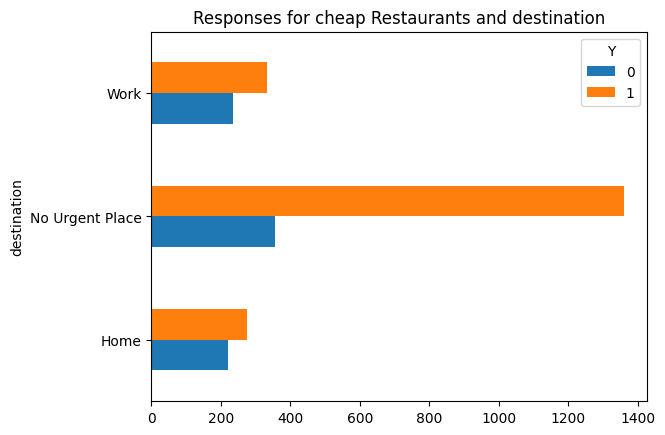

In [389]:
#Groupby coupon and then group by destinatin and analyze for values of Y
df_bar = data.query('coupon == "Restaurant(<20)"') 

df_bar.groupby('destination').Y.value_counts().unstack().plot.barh()
plt.title("Responses for cheap Restaurants and destination")
plt.show()

One can infer from the above plot that if the driver does not have an urgent place to go, there is higher probability of accepting a coupon for a cheap restaurant

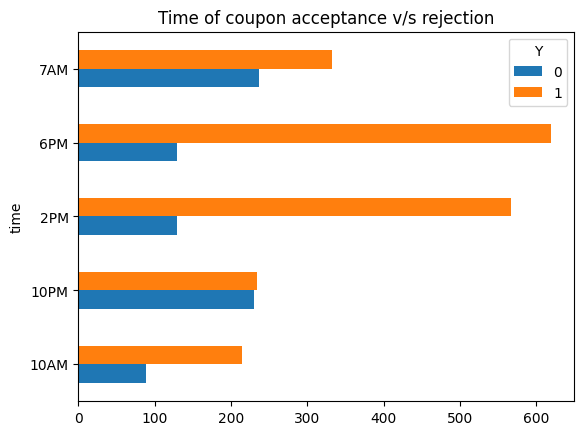

In [391]:
df_bar.groupby('time').Y.value_counts().unstack().plot.barh()
plt.title("Time of coupon acceptance v/s rejection")
plt.show()

Based on the above plot, there is a higher probability of accepting a cheap restaurant coupon at 6 PM , followed by 2 PM

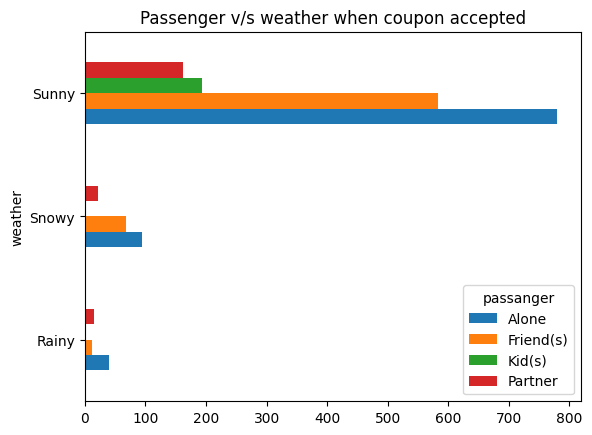

In [393]:
df_bar.query('Y == 1').groupby('weather').passanger.value_counts().unstack().plot.barh()
plt.title("Passenger v/s weather when coupon accepted")
plt.show()

Sunny weather and when alone have high probability of aceepting a coupon v/s whent the weather is snowy or Rainy

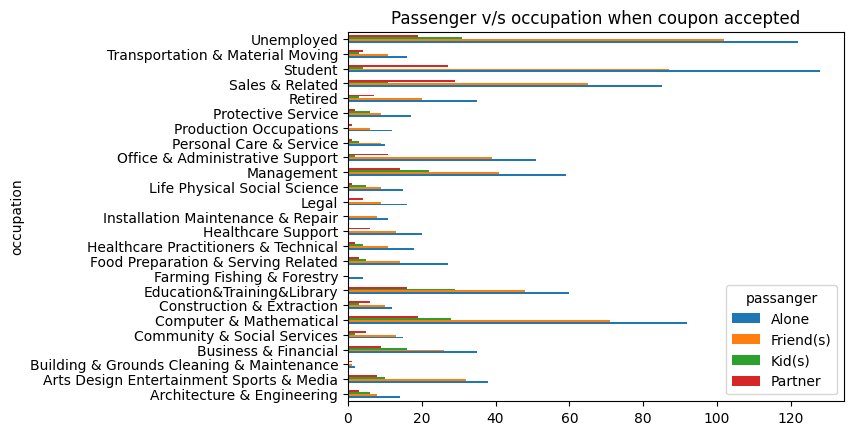

In [394]:
df_bar.query('Y == 1').groupby('occupation').passanger.value_counts().unstack().plot.barh()
plt.title("Passenger v/s occupation when coupon accepted")
plt.show()

Occupation of Farming, Fishing and Forestry have the lowest probability of accepting coupon